In [2]:
# This section enables to use the module code referenced in the repo
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
# Imports for the excercise
import pandas as pd 
import logging
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from arcus.ml.evaluation import classification as clev    

## Initial model evaluation of a basic Logic Regression classifier

1. Loading of a dataset
1. Fitting simple Logistic Regression classifier

In [9]:
df = pd.read_csv('../tests/resources/datasets/student-admission.csv')
y = df.Admission.values
X = np.asarray(df.drop(['Admission'],axis=1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# trainen van de logistic regression classifier
logreg = linear_model.LogisticRegression(C=1e5,solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Visualization of model evaluation, without Roc curve

In [10]:
clev.evaluate_model(logreg, X_test, y_test)

precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.79      0.88        19

    accuracy                           0.87        30
   macro avg       0.87      0.89      0.86        30
weighted avg       0.90      0.87      0.87        30

[[11  0]
 [ 4 15]]
Accuracy score: 86.66666666666667


### Adding the ROC curve

precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.79      0.88        19

    accuracy                           0.87        30
   macro avg       0.87      0.89      0.86        30
weighted avg       0.90      0.87      0.87        30

[[11  0]
 [ 4 15]]
Accuracy score: 86.66666666666667


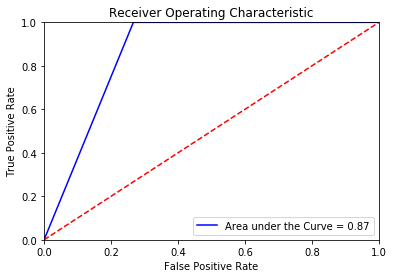

In [11]:
clev.evaluate_model(logreg, X_test, y_test, show_roc=True)